In [19]:
%matplotlib notebook
from gen_acid import gen_acid
from pylab import *
import ipywidgets as widgets
import xlrd

In [20]:
#load acid data
wkb = xlrd.open_workbook("acid_data.xlsx")
sheet = wkb.sheet_by_index(0)
acids = {}
for row in range(1, sheet.nrows):
    name = sheet.cell(row,0).value
    values = [val for val in sheet.row_values(row,1) if val]
    acids[name] = gen_acid(values)
    
    

Dropdown(description='Acid:', options=('acetic', 'acetylacetone', 'acetylene', 'alanine', 'o-aminobenxenesulfo…

Button(description='Clear Plot', style=ButtonStyle())

<IPython.core.display.Javascript object>


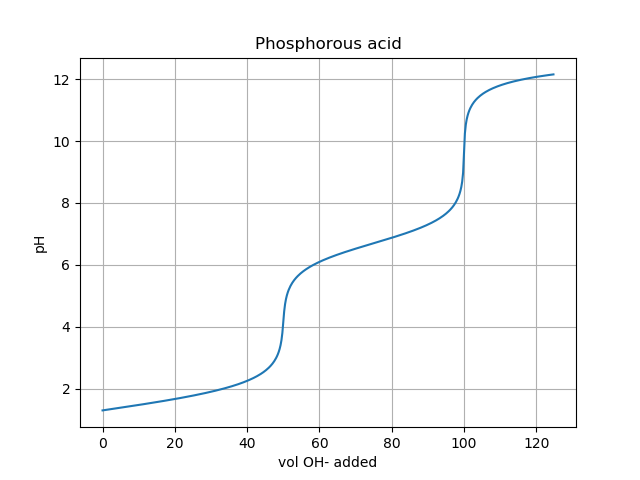

In [21]:
w = widgets.Dropdown(options=acids.keys(), description = 'Acid:')
b = widgets.Button(description="Clear Plot")
display(w)
display(b)

In [22]:
def acid_change(change):
    key = change['new']
    acid = acids[key]
    
    acid.titrate()
    plot(acid.vlist, acid.pH)
    title(key)
    xlabel("vol OH- added")
    ylabel("pH")
    grid(True)
    show()
    
w.observe(acid_change, names='value')

In [23]:
def on_button_click(b):
    figure(1).clf()

b.on_click(on_button_click)

In [ ]:
a = acids['Phosphorous acid']
dir(a)
a.K